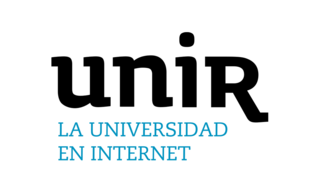
_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Caso grupal: Detección de anomalías y técnicas de agrupamiento

## Objetivos

- Entender el método de clustering K-means.
- Generar agrupamientos con los métodos de clustering indicados y realizar una comparativa de ambos.
- Investigar sobre una técnica de detección de anomalías con un caso de uso concreto.


## Descripción de la actividad

El conjunto de datos con el cual vamos a trabajar se encuentra en el siguiente enlace http://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption 

Se trata de un dataset que contiene mediciones del consumo de energía eléctrica en un hogar con una tasa de muestreo de un minuto durante un período de casi 4 años. Están disponibles diferentes magnitudes eléctricas y algunos valores de submedición. Debe descargarse el fichero comprimido que se encuentra en la carpeta 'Data Folder'.

### Tareas que se deben realizar
- Clustering
  - Debes completar el código pedido en este notebook y contestar las preguntas finales.
- Detección de anomalías
  - Buscar dos artículos científicos (https://scholar.google.es/) con un caso de uso de detección de anomalías. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para cada artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la detección de anomalías.
    - Técnicas de detección de anomalías empleadas.
    - Principales resultados de la aplicación y de la investigación.


### Clustering

Comenzamos importando las librerías necesarias y cargando el dataset.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

# se carga el dataset, con separados ;, se transforman las dos columnas Date y Time a una única columna con tipo datetime
# en el fichero CSV existen NaN identificados por ?
df = pd.read_csv('household_power_consumption.txt', sep=';',
                        parse_dates={'dt' : ['Date', 'Time']}, 
                        infer_datetime_format=True,low_memory=False,
                        na_values=['nan','?'])

In [2]:
## cuántas instancias tiene el dataset

In [3]:
### PON AQUÍ TU CÓDIGO
print ('El número de instancias del dataset es: ', df.shape[0])

El número de instancias del dataset es:  2075259


In [4]:
## cuál es el tipo de datos de la variable 'Voltage'.

In [5]:
### PON AQUÍ TU CÓDIGO
df['Voltage'].dtype

dtype('float64')

La variable 'Voltage' es una variable de tipo real, float64.

In [6]:
## ¿es una variable continua o categórica?

Es una variable **contínua**.

In [7]:
# ¿cuáles son los valores mínimo y máximo de la variable 'Voltage'?

In [8]:
### PON AQUÍ TU CÓDIGO
print(df['Voltage'].max(), df['Voltage'].min())

254.15 223.2


El máximo es **254.15** y el mínimo **223.2**

In [9]:
# ¿existe alguna variable con más del 30% de valores faltantes?

In [10]:
## PON AQUÍ TU CÓDIGO

for i in df.columns:
    faltantes = df[i].isnull().sum()
    porcentaje = faltantes/len(df[i])*100
    print("La variable", str(i), " tiene un ", porcentaje,"% de valores faltantes")

La variable dt  tiene un  0.0 % de valores faltantes
La variable Global_active_power  tiene un  1.2518437457686005 % de valores faltantes
La variable Global_reactive_power  tiene un  1.2518437457686005 % de valores faltantes
La variable Voltage  tiene un  1.2518437457686005 % de valores faltantes
La variable Global_intensity  tiene un  1.2518437457686005 % de valores faltantes
La variable Sub_metering_1  tiene un  1.2518437457686005 % de valores faltantes
La variable Sub_metering_2  tiene un  1.2518437457686005 % de valores faltantes
La variable Sub_metering_3  tiene un  1.2518437457686005 % de valores faltantes


Se puede observar que hay un **1.252%** de valores faltantes (con observación del dataset se puede ver que cuando existen 'faltantes' faltan en toda la instancia salvo en date and time)

Ninguna variable tiene más de un 30% de valores faltantes.

In [11]:
# ¿cuántas variables categóricas hay en el dataset? 

In [12]:
### PON AQUÍ TU CÓDIGO
df.dtypes

dt                       datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

Todas las variables excepto la variable _dt_ (fecha), que es de tipo datetime, son **continuas**. También en la definición del dataset se aprecia que los valores son contínuos.

Para los algoritmos de clustering el dataset no puede tener instancias con datos faltantes. ¿Tiene este dataset datos faltantes?

In [13]:
### PON AQUÍ TU CÓDIGO
df.isnull().sum()

dt                           0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Para cada variable hay **25979** valores faltantes, a excepto de la variable _dt_ (fecha) que no tiene ningún valor faltante.

Existen diferentes alternativas para completar los datos faltantes, algunas de ellas las hemos estudiado en la asignatura.
Sin embargo, en esta actividad vamos a prescindir de estos datos.

In [14]:
df.dropna(inplace=True)

#Verificamos que no haya datos faltantes

df.isna().sum()


dt                       0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [15]:
# Calcula las correlaciones de Pearson de las variables

C:\Users\PC\AppData\Local\Temp\ipykernel_2068\232807118.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = df.corr()


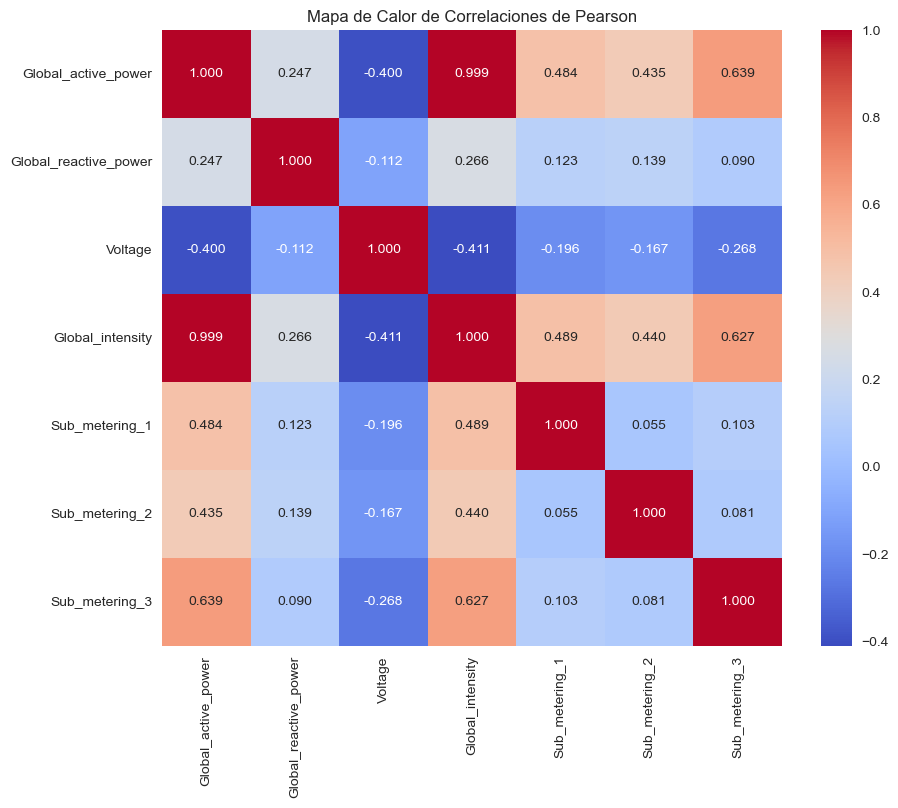

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [16]:
### PON AQUÍ TU CÓDIGO
correlaciones = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Mapa de Calor de Correlaciones de Pearson')
plt.show()

correlaciones

¿Cuál es la variable que tiene mayor correlación con 'Global_active_power'? ¿Son variables dependientes o independientes?

La variable con mayor correlación con _'Global_active_power'_ es **Global_intensity** con una correlación de 0.999. Lo que indica que ambas variables son prácticamente iguales y se podría prescindir de una de ellas ya que la información que aportarían sería practicamente la misma información para formar los clústers.

¿Podemos eliminar alguna variable?

Como se ha mencionado anteriormente, se puede prescindir de la variable de Global_intensity.

In [17]:
# eliminamos variable dt
df = df.drop(columns='dt')
df = df.drop(columns='Global_intensity')

¿Es necesario hacer algún tratamiendo adicional sobre los datos?

Se van a normalizar los datos para eliminar el sesgo hacia variables de mayor escala, mejora la convergencia del algoritmo y evitar la dominancia de ciertas características.

In [18]:
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame


scaler = StandardScaler()

## COMPLETAR
df_scaled = scaler.fit_transform(df.to_numpy())
df = DataFrame(df_scaled, columns=df.columns)

df

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.955077,2.610721,-1.851816,-0.182337,-0.051274,1.249421
1,4.037085,2.770406,-2.225274,-0.182337,-0.051274,1.130897
2,4.050326,3.320432,-2.330213,-0.182337,0.120487,1.249421
3,4.063567,3.355917,-2.191324,-0.182337,-0.051274,1.249421
4,2.434881,3.586573,-1.592556,-0.182337,-0.051274,1.249421
...,...,...,...,...,...,...
2049275,-0.137724,-1.097519,-0.126500,-0.182337,-0.223036,-0.765477
2049276,-0.139616,-1.097519,-0.259217,-0.182337,-0.223036,-0.765477
2049277,-0.145291,-1.097519,-0.314772,-0.182337,-0.223036,-0.765477
2049278,-0.149074,-1.097519,-0.351810,-0.182337,-0.223036,-0.765477


Los métodos de clustering necesitan saber de antemano cuántos clusters deben crear.
¿Cuál es uno de los métodos más populares para saber cuál es el número apropiado de clústers?

El método **Elbow**. Se basa en la idea de que los clústers adicionales mejorarán la explicación de la varianza dentro del conjunto de datos, pero que este efecto disminuirá a medida que se añadan más y más clústers. Por lo tanto, el número apropiado de clústers se puede determinar observando el punto en el que la adición de otro clúster no proporciona mucho mejoramiento en la explicación de la varianza.

Crea una lista de 20 modelos de KMeans y entrénalos. 

Haciendo uso del método indicado en la respuesta anterior, indica cuál es el número de clusters que parece más prometedor.

El modelo de KMeans debe tener los siguientes parámetros:
- n_clusters (entre 1 y 20)
- init: k-means++
- algorithm: algoritmo de Lloyd

In [20]:
from sklearn.cluster import KMeans

nc = range(1, 21) # intervalo de 20 clusters
kmeans = [KMeans(n_clusters=n, init='k-means++', algorithm='lloyd') for n in nc] #introduce aqui la sentencia para crear los 20 modelos
#kmeans = [KMeans(n_clusters=n, init='k-means++', algorithm='elkan') for n in nc] #introduce aqui la sentencia para crear los 20 modelos

kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19),
 KMeans(n_clusters=20)]

In [21]:
X = df.copy()

# entrena cada uno de los modelos y guarda el resultado en una lista.
score = [i.fit(X) for i in kmeans]

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

A partir de estos resultados, ¿cómo sabemos cuál es el número óptimo de clústers? ¿qué número es?

Usamos el método Elbow descrito más arriba para ver el "codo" y determinar cuando se hace más estable la inercia en el cluster y no mejora el hecho de añadir un nuevo cluster.

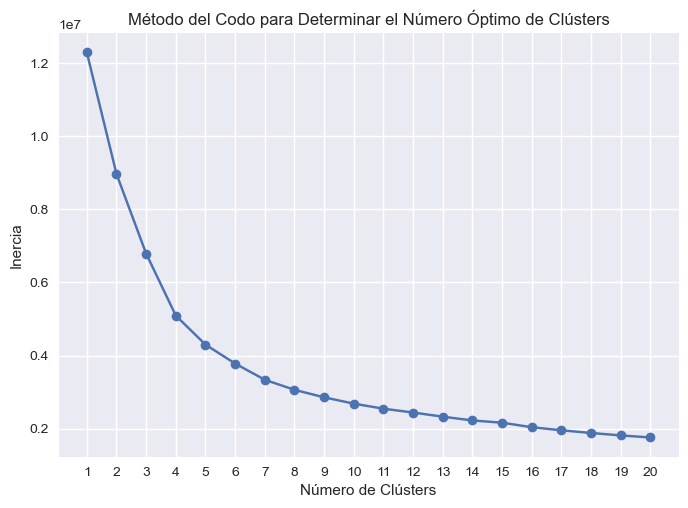

In [22]:
### PON AQUÍ TU CÓDIGO
inertia = [model.inertia_ for model in kmeans]

# Graficar el método del codo
plt.plot(nc, inertia, marker='o')
plt.xlabel('Número de Clústers')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clústers')
plt.xticks(nc)
plt.show()

In [23]:
# Después de decidir el número de clusters, entrena el modelo con dicho número
n = 5

In [24]:
kmeans = KMeans(n_clusters = n).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[-0.31977317  1.20888259  0.06111901 -0.16170317 -0.06561119 -0.57346873]
 [ 0.70311396 -0.05670883 -0.34615691 -0.15086408 -0.1457814   1.35992444]
 [-0.62125033 -0.54181308  0.32078802 -0.1767867  -0.18444678 -0.71980791]
 [ 2.52745733  0.6118533  -0.99009733  0.11370222  5.86443591  0.50544412]
 [ 2.70081102  0.67641757 -1.11918102  5.80108281  0.05344542  0.56142542]]


In [25]:
kmeansmodel = KMeans(n_clusters = n, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Ahora toca interpretar lo que Kmeans ha realizado. Recordemos que el objetivo de KMeans es encontrar patrones en los datos.

Lo primero que vamos a realizar es un gráfico para visualizar los clústers que ha creado en base a las variables utilizadas para crearlos.

In [26]:
# import plotly.express as px

# clusters = pd.DataFrame(X,columns=X.columns)
# clusters['label'] = kmeansmodel.labels_
# polar = clusters.groupby("label").mean().reset_index()
# polar = pd.melt(polar,id_vars=["label"])
# fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=600)
# fig4.show()

import plotly.express as px

#print(X)
clusters = pd.DataFrame(X,columns=df.columns)

#print(clusters)

clusters['label'] = kmeansmodel.labels_
polar = clusters.groupby("label").mean().reset_index()

polar = polar.melt(id_vars=['label'], value_name='etiqueta')

fig4 = px.line_polar(polar, r="etiqueta", theta="variable", color="label", line_close=True)

print(polar)

fig4.show()

c:\Users\PC\anaconda3\Lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
c:\Users\PC\anaconda3\Lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
c:\Users\PC\anaconda3\Lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(trace_data.iloc[0])
c:\Users\PC\anaconda3\Lib\site-packages\plotly\express\_core.py:271: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trace_data = trace_data.append(

    label               variable  etiqueta
0       0    Global_active_power  2.530634
1       1    Global_active_power -0.621497
2       2    Global_active_power  0.703214
3       3    Global_active_power -0.320144
4       4    Global_active_power  2.698735
5       0  Global_reactive_power  0.611891
6       1  Global_reactive_power -0.542250
7       2  Global_reactive_power -0.055887
8       3  Global_reactive_power  1.206718
9       4  Global_reactive_power  0.676537
10      0                Voltage -0.991216
11      1                Voltage  0.321199
12      2                Voltage -0.346071
13      3                Voltage  0.060517
14      4                Voltage -1.118483
15      0         Sub_metering_1  0.119727
16      1         Sub_metering_1 -0.176798
17      2         Sub_metering_1 -0.150859
18      3         Sub_metering_1 -0.161722
19      4         Sub_metering_1  5.800919
20      0         Sub_metering_2  5.865965
21      1         Sub_metering_2 -0.184485
22      2  

En base a la figura de la representación de los clusters, ¿cuál es la variable que más nos ayuda a diferenciar los usos?

Visto tanto el gráfico como la tabla, parece que las vriables submetering son las que ayudan a segmentar más sin duda entre la clase 0 y la clase 4 ya que caracterizan totalmente esas clases. Un valor en una de esas clases "caracterizará" su consumo como definen las variables de submetering del dataset por el "modelo" de electrodomesticos que caracteriza ese consumo. Por otra parte la clase 2 está caracterizada por sub_metering_3 (aunque en menor medida)  y en la clase 1 y 3 parece que Voltage y Global reactive Power son las que definen esas clases respectivamente.

De modo que quizás las que más influyen en la diferenciación de los usos son las variables **sub_metering**.

In [27]:
pie = clusters.groupby('label').size().reset_index()
pie.columns = ['label','value']
px.pie(pie,values ='value',names ='label')

¿Qué representa el gráfico de la celda anterior?

El número de instancias que han sido asociadas a cada clase del dataset. Muchas más en la clase 1 y muchas menos por ejemplo en la clase 0.

¿Qué características tiene el consumo del cluster 0?

A la vista del gráfico obtenido anteriormente, todas las instancias asociadas con el cluster 0 tienen un sub_metering_2 elevado h, esto quiere decir que tiene mucho consumo caracterizado por un entorno de lavandería con una lavadora, una secadora un refrigerador y una luz. Posiblemente las muestras que caigan en este cluster hagan mucho uso de esos elementos (o el consumo se pueda modelar por el consumo de esos elementos).  

Repite lo mismo pero esta vez utiliza para el entrenamiento de KMeans el algortimo de 'Elkan', ¿existen diferencias en el número de clústers? ¿y en la importancia de las variables?

Aparentemente ELKAN genera una gráfica para el método de Elbow identica con lo que tomarías las mismas clases (5) y la importancia de las variables se mantiene.

### Detección de anomalías

## **Artículo 1**

https://ieeexplore.ieee.org/abstract/document/7507933/authors#authors

(Kumari et al., 2016)

- Título: Anomaly detection in network traffic using K-mean clustering
- Autores: R. Kumari; Sheetanshu; M. K. Singh; R. Jha; N.K. Singh
- Revista: IEEE
- Publicado en: 3rd International Conference on Recent Advances in Information Technology (RAIT)
- Año de publicación: 2016

- Objetivo: Detección de anomalías en el tráfico de redes informático. Un objetivo cada vez más requerido debido al aumento de ciberataques y de datos personales y críticos que manejan las empresas.

La técnica utilizada es **K-Means**, utilizando datos en tiempo real mediante StreamingKMeans de Spark.


**Principales resultados de la aplicación y de la investigación:**

El método de detección de anomalías basado en K-means es una herramienta útil para la seguridad de redes. El principal problema es el tratamiento de datos, especialmente en tiempo real.

Por otro lado, se utiliza la distancia Euclidea, pudiendo usar la Mahalonoan. Finalmente, los investigadores recomiendan sustituir el modelo iterativo de k-means por uno de mezcla Gaussiana o un modelo DBSCAN, disponible también en Spark.

Kumari, R., Singh, M. K., Jha, R., & Singh, N. K. (2016, March). Anomaly detection in network traffic using K-mean clustering. In 2016 3rd international conference on recent advances in information technology (RAIT) (pp. 387-393). IEEE.

## **Artículo 2**

(https://www.sciencedirect.com/science/article/pii/S1877050915004172)

(Ravale et al.,2015)

- Título: Feature Selection Based Hybrid Anomaly Intrusion Detection System Using K Means and RBF Kernel Function
- Autores: Ujwala Ravale, Nilesh Marathe, Puja Padiya
- Revista: Procedia Computer Science
- Año de publicación: 2015

- Objetivo: Mejorar la detección de las intrusiones de seguridad. Su meta principal es reducir el número de atributos utilizados.

La técnica utilizada para ello es **K-Means** junto a **Support Vector Machine (SVM)**, usando una función de kernel radial (RBF).


**Principales resultados de la aplicación y de la investigación:**

Se reducen la complejidad, aumentando el rendimiento.
Los resultados demuestran que la tasa de precisión y detección de DOS, PROBE, U2R y R2L aumenta.


Además, para conjuntos de datos con un número reducido de atributos, el rendimiento aumenta ligeramente en comparación con el conjunto de 41 atributos. Asimismo, la tasa de falsos positivos también disminuye con la técnica propuesta.

En conclusión, aumenta la precisión de la detección de anomalías en en el dataset propuesto  KDDCUP’99

Ravale, U., Marathe, N., & Padiya, P. (2015). Feature selection based hybrid anomaly intrusion detection system using K means and RBF kernel function. Procedia Computer Science, 45, 428-435.